## Do some setup

In [3]:
import fstpy
import glob
import dask.array as da
import pandas as pd
import os

CMCGRIDF = "/space/hall5/sitestore/eccc/prod/hubs/gridpt/dbase"
ATM_MODEL_DFILES = "/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles"

## Usage examples
Python-RPN Examples <https://wiki.cmc.ec.gc.ca/wiki/Python-RPN/2.1/examples>
### Setup our files
This is external to the library because python can manage that better

In [4]:
# Open all RPNStd files in the $ATM_MODEL_DFILES/bcmk/ directory
directory = os.path.join(ATM_MODEL_DFILES, "bcmk", "**")
files = glob.glob(directory)
files = [f for f in files if fstpy.maybeFST(f)]
files

['/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/2009042700_000',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/geophy.fst',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/clim_gemdm320_1080x540_v2_de_francois_withiceline',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/climato',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/clim_gemdm_2018',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/climato-old',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/clim_gemdm320_1080x540_v2_de_francois_withiceline_i8_glorys1v1.0_corr_EMIB',
 '/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles/bcmk/2009042

## Queries
### This example shows how to
- get the list of all records matching selection criteria
- get the metadata and decode it
- then print some values 

### Rpnpy
```python
import os, sys
import rpnpy.librmn.all as rmn
ATM_MODEL_DFILES = os.getenv('ATM_MODEL_DFILES').strip()
fileId = rmn.fstopenall(ATM_MODEL_DFILES+'/bcmk', rmn.FST_RO)
for k in rmn.fstinl(fileId, nomvar='TT', ip2=12):
    m = rmn.fstprm(k)
    rp1 = rmn.DecodeIp(m['ip1'], m['ip2'], m['ip3'])[0]
    level  = "%f %s" % (rp1.v1, rmn.kindToString(rp1.kind))
    dateo  = "%8.8d.%8.8d" % rmn.newdate(rmn.NEWDATE_STAMP2PRINT,m['dateo'])
    print("CB11qd: %s (%d, %d) level=%s, dateo=%s + %s" %
          (m['nomvar'], m['ip1'], m['ip2'], level, dateo, float(m['npas'] * m['deet']) / 3600.))
rmn.fstcloseall(fileId)
```

### Fstpy

In [5]:
df = fstpy.StandardFileReader(files, decode_metadata=True, query='(nomvar=="TT") and (ip2==12)').to_pandas()
df[["nomvar", "ip1", "ip2", "date_of_observation", "date_of_validity", "forecast_hour"]]

,nomvar,ip1,ip2,date_of_observation,date_of_validity,forecast_hour
0,TT,97642568,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
1,TT,97738568,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
2,TT,97899568,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
3,TT,98152568,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
4,TT,96569992,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
...,...,...,...,...,...,...
77,TT,95356840,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
78,TT,95366840,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
79,TT,93423264,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00
80,P0,0,12,2009-04-27,2009-04-27 12:00:00,0 days 12:00:00


### This example shows how to
- get the list of all records matching a more complex selection criteria

### Rpnpy
```python
import os, sys
import rpnpy.librmn.all as rmn
ATM_MODEL_DFILES = os.getenv('ATM_MODEL_DFILES').strip()
fileId = rmn.fstopenall(ATM_MODEL_DFILES+'/bcmk_p/anlp2015070706_000', rmn.FST_RO)
for k in rmn.fstinl(fileId, nomvar='TT',
                    ip1=rmn.ip1_all(500., rmn.LEVEL_KIND_PMB),
                    datev=rmn.newdate(rmn.NEWDATE_PRINT2STAMP, 20150707, 6000000)):
        m = rmn.fstprm(k)
        print("CB11bqd: %s (%d, %d, %s)" % (m['nomvar'], m['ip1'], m['ip2'], m['datev']))
rmn.fstcloseall(fileId)
```

### Fstpy

In [6]:
import datetime

filename = os.path.join(ATM_MODEL_DFILES, "bcmk_p", "anlp2015070706_000")

df = fstpy.StandardFileReader(filename, decode_metadata=True).to_pandas()

mydate = datetime.datetime(year=2015, month=7, day=7, hour=6)

print(f"selection date of validity {mydate}")

# nomvar='TT' at 500mb and valide date=20150707.06000000
selection_df = df.loc[
    (df.nomvar == "TT") & (df.level == 500) & (df.ip1_pkind == "mb") & (df.date_of_validity == mydate)
]

selection_df[["nomvar", "level", "ip1_pkind", "ip2", "date_of_observation", "date_of_validity", "forecast_hour"]]

selection date of validity 2015-07-07 06:00:00


,nomvar,level,ip1_pkind,ip2,date_of_observation,date_of_validity,forecast_hour
224,TT,500.0,mb,0,2015-07-07 06:00:00,2015-07-07 06:00:00,0 days


### This example shows how to
- get the data of all records matching selection criteria
- then print statistics 

### Rpnpy
```python
import os, sys
import rpnpy.librmn.all as rmn
rmn.fstopt(rmn.FSTOP_MSGLVL,rmn.FSTOPI_MSG_CATAST)
ATM_MODEL_DFILES = os.getenv('ATM_MODEL_DFILES').strip()
fileId = rmn.fstopenall(ATM_MODEL_DFILES+'/bcmk', rmn.FST_RO)
for k in rmn.fstinl(fileId, nomvar='TT', ip2=12):
    r = rmn.fstluk(k)
    print("CB12qd: %s (ip1=%s, ip2=%d) mean=%f, std=%f, min=%f, max=%f" %
          (r['nomvar'], r['ip1'], r['ip2'], r['d'].mean(), r['d'].std(), r['d'].min(), r['d'].max()))
rmn.fstcloseall(fileId)
```

### Fstpy version 1

In [7]:
import numpy as np

df = fstpy.StandardFileReader(files, decode_metadata=True, query='(nomvar=="TT") and (ip2==12)').to_pandas()
df = fstpy.compute(df)
df["mean"] = df["d"].map(np.mean)
df["std"] = df["d"].map(np.std)
df["min"] = df["d"].map(np.min)
df["max"] = df["d"].map(np.max)
df[["nomvar", "level", "ip2", "mean", "std", "min", "max"]]

Read(999) P0   P  G133K80P          200     100     1  354514400            0        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     97642568        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     97738568        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     97899568        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     98152568        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     96569992        12         0      900       48  R 12  G     0     0     0     0
Read(999) TT   P  G133K80P          200     100     1  354514400     96621992        12         0      900

,nomvar,level,ip2,mean,std,min,max
0,TT,0.000125,12,-36.181923,5.362104,-50.649536,-25.751099
1,TT,0.000221,12,-29.624002,7.580826,-53.338963,-6.417088
2,TT,0.000382,12,-19.593384,9.278481,-45.793934,4.518566
3,TT,0.000635,12,-11.715744,9.344718,-39.667454,9.941921
4,TT,0.001010,12,-10.190917,11.401114,-41.530300,11.219700
...,...,...,...,...,...,...,...
77,TT,0.985000,12,5.157967,20.984278,-63.226536,41.835964
78,TT,0.995000,12,5.503872,21.702599,-65.360222,42.889778
79,TT,1.000000,12,5.237006,22.714193,-71.501175,43.405075
80,P0,0.000000,12,966.402893,94.106522,530.958008,1037.958008


### Fstpy version 2
Statistics for the first column of TT

<AxesSubplot:xlabel='level'>

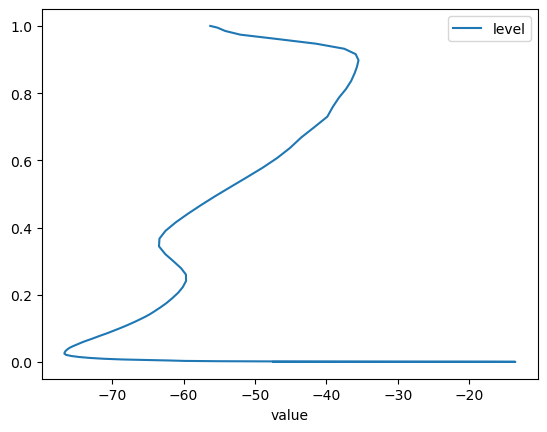

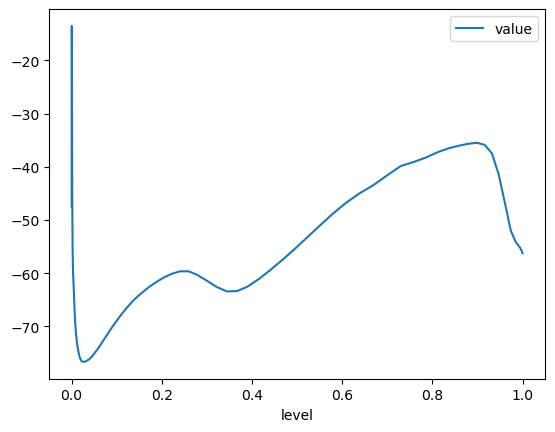

In [8]:
tt_df = df.loc[df.nomvar == "TT"]
column = da.stack(tt_df.d)
column = column[:, 0, 0].compute()
tt_df.level
tt_new_df = pd.DataFrame({"level": tt_df.level, "value": column}).sort_values(by="level").reset_index(drop=True)
tt_new_df.set_index("value").plot()
tt_new_df.set_index("level").plot()

### This example shows how to 
- get the vertical grid definition. 
- Use it to read a 3D field (records on all levels)
- get the profile at one point

### Rpnpy
```python
import os, sys, datetime
import numpy as np
import rpnpy.librmn.all as rmn
import rpnpy.vgd.all as vgd
rmn.fstopt(rmn.FSTOP_MSGLVL,rmn.FSTOPI_MSG_CATAST)
fdate     = datetime.date.today().strftime('%Y%m%d') + '00_048'
CMCGRIDF  = os.getenv('CMCGRIDF').strip()
fileId = rmn.fstopenall(CMCGRIDF+'/prog/regeta/'+fdate, rmn.FST_RO)
v = vgd.vgd_read(fileId)
(tlvlkeys, rshape) = ([], None)
for ip1 in vgd.vgd_get(v, 'VIPT'):
    (lval, lkind) = rmn.convertIp(rmn.CONVIP_DECODE, ip1)
    key = rmn.fstinf(fileId, nomvar='TT', ip2=48, ip1=rmn.ip1_all(lval, lkind))
    if key is not None: tlvlkeys.append((ip1, key['key']))
    if rshape is None and key is not None: rshape = key['shape']
(r2d, r3d, k, rshape) = ({'d' : None}, None, 0, (rshape[0], rshape[1], len(tlvlkeys)))
for ip1, key in tlvlkeys:
    r2d = rmn.fstluk(key, dataArray=r2d['d'])
    if r3d is None:
        r3d = r2d.copy()
        r3d['d'] = np.empty(rshape, dtype=r2d['d'].dtype, order='FORTRAN')
    r3d['d'][:,:,k] = r2d['d'][:,:]
rmn.fstcloseall(fileId)
r3d.update({'vgd':v, 'ip1list':[x[0] for x in tlvlkeys], 'shape':rshape, 'nk':rshape[2]})
(i1, j1) = (rshape[0]//2, rshape[1]//2)
print("CB14bqd: The TT profile at point (%d, %d) is:" % (i1, j1))
for k in xrange(rshape[2]):
    (ldiagval, ldiagkind) = rmn.convertIp(rmn.CONVIP_DECODE, r3d['ip1list'][k])
    print("CB14bqd: TT(%d, %d, %7.2f %s) = %6.1f C [mean=%6.1f, std=%6.1f, min=%6.1f, max=%6.1f]" %
          (i1, j1, ldiagval, rmn.kindToString(ldiagkind), r3d['d'][i1,j1,k],
           r3d['d'][:,:,k].mean(), r3d['d'][:,:,k].std(), r3d['d'][:,:,k].min(), r3d['d'][:,:,k].max()))
```

### Fstpy

In [10]:
fdate = datetime.date.today().strftime("%Y%m%d") + "00_048"
filename = os.path.join(CMCGRIDF, "prog", "regeta", fdate)

# get the records
df = fstpy.StandardFileReader(filename, decode_metadata=True, query='(nomvar=="TT") and (ip2==48)').to_pandas()

# make sure they are sorted correclty
tt_df = df.loc[df.nomvar == "TT"].sort_values(by="level")

# load the data
tt_df = fstpy.compute(tt_df)

# define a point
i1, j1 = (tt_df.iloc[0].d.shape[0] // 2, tt_df.iloc[0].d.shape[1] // 2)

# get the lat and lon of that  point
lat_lon_df = fstpy.get_2d_lat_lon_df(df)
lats = lat_lon_df.loc[lat_lon_df.nomvar == "LA"].iloc[0].d
lons = lat_lon_df.loc[lat_lon_df.nomvar == "LO"].iloc[0].d

# get that particular column of data
tt_profile = np.stack(tt_df.d)[:, i1, j1]

# get the stats
meanv = np.mean(tt_profile)
stdv = np.std(tt_profile)
minv = np.min(tt_profile)
maxv = np.max(tt_profile)

print(f"levels\n{tt_df.level}")
print(
    f"Profile of TT at lat,lon: {lats[i1, j1]:.4f}, {lons[i1, j1]:.4f}  mean: {meanv:.4f} std: {stdv:.4f} min: {minv:.4f} max: {maxv:.4f}"
)

Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2000        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2102        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2233        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2374        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2508        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2625        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) TT   P  R1_V810_N        1102    1076     1  465387200         2720        48         0      300

## Edit: In-Place Record Meta Edition (a la editfst zap w/o copy) 
### This example shows how to
- select records in a RPNStd file
- edit in-place

### Rpnpy
```python
import sys, os, os.path, stat, shutil
import rpnpy.librmn.all as rmn
fileName  = 'geophy.fst'
ATM_MODEL_DFILES = os.getenv('ATM_MODEL_DFILES').strip()
fileName0 = os.path.join(ATM_MODEL_DFILES,'bcmk',fileName)
shutil.copyfile(fileName0, fileName)
st = os.stat(fileName)
os.chmod(fileName, st.st_mode | stat.S_IWRITE)
fileId = rmn.fstopenall(fileName, rmn.FST_RW_OLD)
rmn.fst_edit_dir(rmn.fstinl(fileId), etiket='MY_NEW_ETK')
rmn.fstcloseall(fileId)
```

### Fstpy

In [11]:
import sys, os, os.path, stat, shutil

filename = "geophy.fst"
ATM_MODEL_DFILES = "/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles"
fileName0 = os.path.join(ATM_MODEL_DFILES, "bcmk", filename)
shutil.copyfile(fileName0, filename)
st = os.stat(filename)
os.chmod(filename, st.st_mode | stat.S_IWRITE)

df = fstpy.StandardFileReader(filename).to_pandas()

# change all etiket
df["etiket"] = "MY_NEW_ETK"

df.loc[df.nomvar == "ME", "etiket"] = "TOTO"

fstpy.StandardFileWriter(filename, df, mode="update", overwrite=True).to_fst()

df = fstpy.StandardFileReader(filename).to_pandas()

print(df[["nomvar", "typvar", "etiket"]].head(10))

# cleanup
fstpy.delete_file(filename)


       NOMV TV   ETIQUETTE        NI      NJ    NK (DATE-O  h m s)           IP1       IP2       IP3     DEET     NPAS  DTY   G   IG1   IG2   IG3   IG4

    0- >>   X  MY_NEW_ETK        201       1     1 00000000 000000          2002      1000         0        0        0  E 32  E   900     0 43200 43200

       NOMV TV   ETIQUETTE        NI      NJ    NK (DATE-O  h m s)           IP1       IP2       IP3     DEET     NPAS  DTY   G   IG1   IG2   IG3   IG4

    1- ^^   X  MY_NEW_ETK          1     100     1 00000000 000000          2002      1000         0        0        0  E 32  E   900     0 43200 43200

       NOMV TV   ETIQUETTE        NI      NJ    NK (DATE-O  h m s)           IP1       IP2       IP3     DEET     NPAS  DTY   G   IG1   IG2   IG3   IG4

    2- >>   X  MY_NEW_ETK        201       1     1 00000000 000000          2002      1001         0        0        0  E 32  E   900     0 43200 43200

       NOMV TV   ETIQUETTE        NI      NJ    NK (DATE-O  h m s)           IP1 

## Edit: Copy records (a la editfst desire)

### This example shows how to
- select records in a RPNStd file
- read the record data + meta
- write the record data + meta 

### Rpnpy
```python
import os, os.path
import rpnpy.librmn.all as rmn
ATM_MODEL_DFILES = os.getenv('ATM_MODEL_DFILES').strip()
fileNameOut = 'myfstfile.fst'
fileIdIn  = rmn.fstopenall(ATM_MODEL_DFILES+'/bcmk')
fileIdOut = rmn.fstopenall(fileNameOut, rmn.FST_RW)
for k in rmn.fstinl(fileIdIn, nomvar='UU') + rmn.fstinl(fileIdIn, nomvar='VV'):
    rmn.fstecr(fileIdOut, rmn.fstluk(k))
rmn.fstcloseall(fileIdIn)
rmn.fstcloseall(fileIdOut)
```

### Fstpy

In [12]:
fileNameIn = os.path.join(ATM_MODEL_DFILES, "bcmk")
ATM_MODEL_DFILES = "/fs/ssm/eccc/mrd/rpn/MIG/GEM/d/gem-data/gem-data_4.2.0/gem-data_4.2.0_all/share/data/dfiles"
directory = os.path.join(ATM_MODEL_DFILES, "bcmk", "**")
files = glob.glob(directory)
files = [f for f in files if fstpy.maybeFST(f)]

df = fstpy.StandardFileReader(files).to_pandas()

# select UU and VV
uv_df = df.loc[df.nomvar.isin(["UU", "VV"])]

fileNameOut = "myfstfile.fst"

# write the records
fstpy.StandardFileWriter(fileNameOut, uv_df).to_fst()

df = fstpy.StandardFileReader(fileNameOut).to_pandas()

# check
print(df[["nomvar", "typvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2"]].head(10))

# cleanup
fstpy.delete_file(fileNameOut)

Read(997) UU   P  G133K80P          200     100     1  354514400     97642568         0         0      900        0  R 12  G     0     0     0     0
Read(997) VV   P  G133K80P          200     100     1  354514400     97642568         0         0      900        0  R 12  G     0     0     0     0
Read(997) UU   P  G133K80P          200     100     1  354514400     97738568         0         0      900        0  R 12  G     0     0     0     0
Read(997) VV   P  G133K80P          200     100     1  354514400     97738568         0         0      900        0  R 12  G     0     0     0     0
Read(997) UU   P  G133K80P          200     100     1  354514400     97899568         0         0      900        0  R 12  G     0     0     0     0
Read(997) VV   P  G133K80P          200     100     1  354514400     97899568         0         0      900        0  R 12  G     0     0     0     0
Read(997) UU   P  G133K80P          200     100     1  354514400     98152568         0         0      900

## Edit: Read, Edit, Write records with meta, grid and vgrid

### This example shows how to
- select records in a RPNStd file
- read the record data + meta
- edit/use record data and meta (compute the wind velocity)
- write the recod data + meta
- copy (read/write) the record grid descriptors
- copy (read/write) the file vgrid descriptor 

### Rpnpy
```python
import os, sys, datetime
from scipy.constants import knot as KNOT2MS
import numpy as np
import rpnpy.librmn.all as rmn
import rpnpy.vgd.all as vgd
fdate       = datetime.date.today().strftime('%Y%m%d') + '00_048'
fileNameOut = 'uvfstfile.fst'
fileIdIn    = rmn.fstopenall(os.getenv('CMCGRIDF')+'/prog/regeta/'+fdate)
fileIdOut   = rmn.fstopenall(fileNameOut, rmn.FST_RW)
vgd.vgd_write(vgd.vgd_read(fileIdIn), fileIdOut)
(uu, vv, uvarray, copyGrid) = ({'d': None}, {'d': None}, None, True)
for k in rmn.fstinl(fileIdIn, nomvar='UU'):
    uu = rmn.fstluk(k, dataArray=uu['d'])
    vv = rmn.fstlir(fileIdIn, nomvar='VV', ip1=uu['ip1'], ip2=uu['ip2'],
                    datev=uu['datev'],dataArray=vv['d'])
    if uvarray is None:
        uvarray = np.empty(uu['d'].shape, dtype=uu['d'].dtype, order='FORTRAN')
    uv = uu.copy()
    uv.update({'d':uvarray, 'nomvar': 'WSPD'})
    uv['d'][:,:] = np.sqrt(uu['d']**2. + vv['d']**2.) * KNOT2MS
    rmn.fstecr(fileIdOut, uv)
    if copyGrid:
        copyGrid = False
        rmn.writeGrid(fileIdOut, rmn.readGrid(fileIdIn, uu))
rmn.fstcloseall(fileIdIn)
rmn.fstcloseall(fileIdOut)
```

### Fstpy

In [13]:
import copy
import pandas as pd

fileNameIn = os.path.join(CMCGRIDF, "prog", "regeta", fdate)
fileNameOut = "uvfstfile.fst"
fstpy.delete_file(fileNameOut)
df = fstpy.StandardFileReader(fileNameIn, decode_metadata=True).to_pandas()

# select grid meta data
meta_fileds_df = fstpy.select_meta(df)

# select UU and VV, make sure they are sorted, dont assume the file is ok
uu_df = df.loc[df.nomvar == "UU"].sort_values(by="level").reset_index(drop=True)
vv_df = df.loc[df.nomvar == "VV"].sort_values(by="level").reset_index(drop=True)

# create uv container
uv_df = copy.deepcopy(uu_df)
uv_df["nomvar"] = "WSPD"

assert len(uu_df.index) == len(vv_df.index)
for i in uu_df.index:
    uv_df.at[i, "d"] = (uu_df.at[i, "d"] ** 2 + vv_df.at[i, "d"] ** 2) ** 0.5

# unit conversion
uv_df = fstpy.unit_convert(uv_df, to_unit_name="meter_per_second")

# combine uv and grids meta
all_df = pd.concat([meta_fileds_df, uv_df], ignore_index=True)

# write the records
fstpy.StandardFileWriter(fileNameOut, all_df).to_fst()

df = fstpy.StandardFileReader(fileNameOut).to_pandas()

# check
print(df[["nomvar", "typvar", "etiket", "ni", "nj", "nk", "dateo", "ip1", "ip2"]].head(10))

# cleanup
fstpy.delete_file(fileNameOut)

Read(998) UU   P  R1_V810_N        1102    1076     1  465387200        12000        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) VV   P  R1_V810_N        1102    1076     1  465387200        12000        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) UU   P  R1_V810_N        1102    1076     1  465387200        11975        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) VV   P  R1_V810_N        1102    1076     1  465387200        11975        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) UU   P  R1_V810_N        1102    1076     1  465387200        11950        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) VV   P  R1_V810_N        1102    1076     1  465387200        11950        48         0      300      576  f 16  Z 86086 77806     1     0
Read(998) UU   P  R1_V810_N        1102    1076     1  465387200        11900        48         0      300

## Edit: New file and records from scratch

### This example shows how to
- Create a record meta and data from scratch
- Create grid descriptors for the data
- Create vgrid descriptor for the data
- write the recod data + meta
- write the grid descriptors
- write the vgrid descriptor 

### Rpnpy
```python
import os, sys
import numpy as np
import rpnpy.librmn.all as rmn
import rpnpy.vgd.all as vgd
g = rmn.defGrid_ZE(90, 45, 35., 250., 0.5, 0.5, 0., 180., 1., 270.)
lvls = (500.,850.,1000.)
v = vgd.vgd_new_pres(lvls)
ip1list = vgd.vgd_get(v, 'VIPT')
datyp   = rmn.FST_DATYP_LIST['float_IEEE_compressed']
npdtype = rmn.dtype_fst2numpy(datyp)
rshape  = (g['ni'], g['nj'], len(ip1list))
r = rmn.FST_RDE_META_DEFAULT.copy()
r.update(g)
r.update({
    'nomvar': 'MASK',   'nk'    : len(ip1list),
    'dateo' : rmn.newdate(rmn.NEWDATE_PRINT2STAMP, 20160302, 1800000),
    'ip2'   : 6,        'deet'  : 3600, 'npas'  : 6,
    'etiket': 'my_etk', 'datyp' : datyp,
    'd'     : np.empty(rshape, dtype=npdtype, order='FORTRAN')
    })
r['d'][:,:,:] = 0.
r['d'][10:-11,5:-6,:] = 1.
fileNameOut = 'newfromscratch.fst'
fileIdOut = rmn.fstopenall(fileNameOut, rmn.FST_RW)
r2d = r.copy()
for k in range(len(ip1list)):
    r2d.update({'nk':1, 'ip1':ip1list[k], 'd':np.asfortranarray(r['d'][:,:,k])})
    rmn.fstecr(fileIdOut, r2d['d'], r2d)
    print("CB24: wrote %s at ip1=%d" % (r2d['nomvar'], r2d['ip1']))
rmn.writeGrid(fileIdOut, g)
print("CB24: wrote the grid descriptors")
vgd.vgd_write(v, fileIdOut)
print("CB24: wrote the vgrid descriptor")
rmn.fstcloseall(fileIdOut)
```

### Fstpy

In [14]:
import os, sys
import numpy as np
import rpnpy.librmn.all as rmn
import rpnpy.vgd.all as vgd
import pandas as pd

ni: int = 90
nj: int = 45
# Create grid definition
grif_def = rmn.defGrid_ZE(
    ni=ni, nj=nj, lat0=35.0, lon0=250.0, dlat=0.5, dlon=0.5, xlat1=0.0, xlon1=180.0, xlat2=1.0, xlon2=270.0
)

# create a dataframe of the grid definition
grid_df = fstpy.get_df_from_grid(grif_def)


lvls: list = [500.0, 850.0, 1000.0]
myvgd = vgd.vgd_new_pres(lvls)

# Create vertical grid definition
vgrid_df = fstpy.get_df_from_vgrid(myvgd, grid_df.ip1.unique()[0], grid_df.ip2.unique()[0])

ip1list = vgd.vgd_get(myvgd, "VIPT")
datyp = rmn.FST_DATYP_LIST["float_IEEE_compressed"]  # 133
dateo = rmn.newdate(rmn.NEWDATE_PRINT2STAMP, 20160302, 1800000)
ig1 = grid_df.ip1.unique()[0]
ig2 = grid_df.ip2.unique()[0]

# create a 3 row dataframe to hold mask
df = fstpy.create_empty_dataframe(len(ip1list))

new_column_values = {
    "nomvar": "MASK",
    "ni": ni,
    "nj": nj,
    "ip1": ip1list,
    "ip2": 6,
    "dateo": dateo,
    "deet": 3600,
    "npas": 6,
    "datyp": datyp,
    "ig1": ig1,
    "ig2": ig2,
}

# update column values
for k, v in new_column_values.items():
    df[k] = v


array = np.asfortranarray(np.zeros((ni, nj)), dtype=np.float32)
array[10:-11, 5:-6] = 1.0
arrays = [array for _ in range(len(ip1list))]

df["d"] = arrays

all_df = pd.concat([df, grid_df, vgrid_df], ignore_index=True)

# change etiket of all records
all_df["etiket"] = "my_etk"

# necessary to write results
all_df = fstpy.add_grid_column(all_df)

fileNameOut = "newfromscratch.fst"

if os.path.isfile(fileNameOut):
    os.remove(fileNameOut)

fstpy.StandardFileWriter(fileNameOut, all_df).to_fst()

df = fstpy.StandardFileReader(fileNameOut).to_pandas()

# check
print(
    df[
        [
            "nomvar",
            "typvar",
            "etiket",
            "ni",
            "nj",
            "nk",
            "dateo",
            "ip1",
            "ip2",
            "ip3",
            "deet",
            "npas",
            "datyp",
            "nbits",
            "grtyp",
            "ig1",
            "ig2",
            "ig3",
            "ig4",
            "datev",
        ]
    ].to_string()
)

# cleanup
fstpy.delete_file(fileNameOut)

# check metadata cleanup

Write(996) ^^   X  MY_ETK              1      45     1  000000000        66848     39563         0        0        0  E 32  E   900    10 43200 43200
Write(996) >>   X  MY_ETK             90       1     1  000000000        66848     39563         0        0        0  E 32  E   900    10 43200 43200
Write(996) !!   X  MY_ETK              3       4     1  000000000        66848     39563         0        0        0  E 64  X  2001     0     0     0
Write(996) MASK P  MY_ETK             90      45     1  408538100     41394464         6         0     3600        6  e 16  G 66848 39563     0     0
Write(996) MASK P  MY_ETK             90      45     1  408538100     41744464         6         0     3600        6  e 16  G 66848 39563     0     0
Write(996) MASK P  MY_ETK             90      45     1  408538100     39945888         6         0     3600        6  e 16  G 66848 39563     0     0
  nomvar typvar  etiket  ni  nj  nk      dateo       ip1    ip2  ip3  deet  npas  datyp  nbits grtyp

/home/sbf000/fstpy/fstpy/dataframe_utils.py:321: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  toctoc_fields_df = pd.concat(df_list, ignore_index=True)
/home/sbf000/fstpy/fstpy/dataframe_utils.py:111: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  new_df = pd.concat([grid_deformation_fields_df, p0_fields_df,
